<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

In [ ]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/Users/jonathansokoll/Documents/lambda/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [2]:
import re

# strip the spaces at the beginning/end
shops['full_review_text'] = shops['full_review_text'].apply(lambda x: x.strip())
# split at the space, but only once (so right after the date)
shops['full_review_text'] = shops['full_review_text'].apply(lambda x: x.split(" ", 1))

In [3]:
# get the first index (date)
shops['date'] = shops['full_review_text'].apply(lambda x: x[0])
# get the second index (review)
shops['full_review_text'] = shops['full_review_text'].apply(lambda x: re.sub('[^a-zA-Z 0-9]', '', x[1].lower()))

In [4]:
# get star rating
shops['star_rating'] = shops['star_rating'].apply(lambda x: int(x[0:2]))

In [5]:
shops.star_rating.value_counts(normalize=True)

5    0.496324
4    0.309874
3    0.096901
2    0.060399
1    0.036502
Name: star_rating, dtype: float64

In [6]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,date
0,The Factory - Cafe With a Soul,1 checkin love love loved the atmosphere every...,5,11/25/2016
1,The Factory - Cafe With a Soul,listed in date night austin ambiance in austin...,4,12/2/2016
2,The Factory - Cafe With a Soul,1 checkin listed in brunch spots i loved the e...,4,11/30/2016
3,The Factory - Cafe With a Soul,very cool decor good drinks nice seating howe...,2,11/25/2016
4,The Factory - Cafe With a Soul,1 checkin they are located within the northcro...,4,12/3/2016


In [11]:
from collections import Counter
import re

import squarify
import matplotlib.pyplot as plt
import spacy
from spacy.tokenizer import Tokenizer
import seaborn as sns
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_md")

In [12]:
tokenizer = Tokenizer(nlp.vocab)

In [13]:
# without excluding stopwords

tokens = []

for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())
            
    tokens.append(doc_tokens)
    
shops['tokens'] = tokens

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [14]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,date,tokens
0,The Factory - Cafe With a Soul,1 checkin love love loved the atmosphere every...,5,11/25/2016,"[1, checkin, love, love, loved, atmosphere, co..."
1,The Factory - Cafe With a Soul,listed in date night austin ambiance in austin...,4,12/2/2016,"[listed, date, night, austin, ambiance, austin..."
2,The Factory - Cafe With a Soul,1 checkin listed in brunch spots i loved the e...,4,11/30/2016,"[1, checkin, listed, brunch, spots, loved, ecl..."
3,The Factory - Cafe With a Soul,very cool decor good drinks nice seating howe...,2,11/25/2016,"[cool, decor, good, drinks, nice, seating, , ..."
4,The Factory - Cafe With a Soul,1 checkin they are located within the northcro...,4,12/3/2016,"[1, checkin, located, northcross, mall, shoppi..."


In [15]:
def count(docs):
    word_counts = Counter()
    appears_in = Counter()
    
    total_docs = len(docs)
    
    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))
        
    temp = zip(word_counts.keys(), word_counts.values())
    
    wc = pd.DataFrame(temp,columns = ['word', 'count'])
    
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()
    
    wc['pct_total'] = wc['count'].apply(lambda x: x / total)
    
    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()
    
    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')
    
    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
    
    return wc.sort_values(by='rank')

In [16]:
wc = count(shops['tokens'])
wc

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
7,,4831,18226,1.0,0.047003,0.047003,0.634322
42,coffee,4877,10353,2.0,0.026699,0.073702,0.640362
121,place,3659,5426,3.0,0.013993,0.087695,0.480436
160,good,2788,3973,4.0,0.010246,0.097941,0.366071
142,great,2836,3919,5.0,0.010107,0.108047,0.372374
...,...,...,...,...,...,...,...
20252,roomier,1,1,20253.0,0.000003,0.999990,0.000131
20251,windowed,1,1,20254.0,0.000003,0.999992,0.000131
20254,actuality,1,1,20255.0,0.000003,0.999995,0.000131
20253,crass,1,1,20256.0,0.000003,0.999997,0.000131


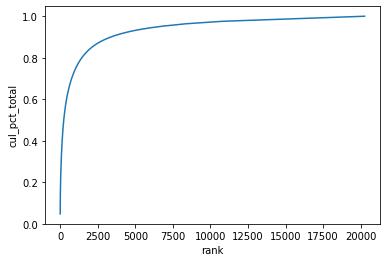

In [17]:
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

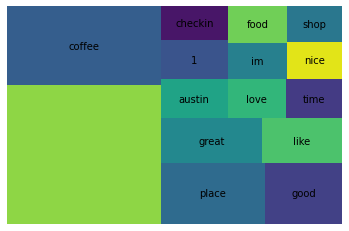

In [21]:
import squarify
import matplotlib.pyplot as plt

wc_top15 = wc[wc['rank'] <= 15]

squarify.plot(sizes=wc_top15['pct_total'], label=wc_top15['word'])
plt.axis('off')
plt.show()

In [28]:
# add to stopwords list
add_stop = ['1', 'im', 'coffee', ' ', 'austin', 'checkin', 'shop', 'place', 'ive']
stop_words = nlp.Defaults.stop_words.union(add_stop)

In [29]:
tokens = []

for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if token.text.lower() not in stop_words:
            doc_tokens.append(token.text.lower())
            
    tokens.append(doc_tokens)
        
shops['tokens'] = tokens   

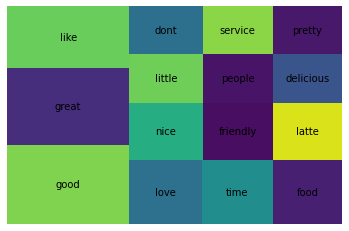

In [30]:
wc = count(shops['tokens'])
wc_top15 = wc[wc['rank'] <= 15]

squarify.plot(sizes=wc_top15['pct_total'], label=wc_top15['word'])
plt.axis('off')
plt.show()

In [31]:
def get_lemmas(text):
    lemmas = []
    
    doc = nlp(text)
    
    for token in doc:
        if ((token.text.lower() not in stop_words) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
            
    return lemmas

shops['lemmas'] = shops['full_review_text'].apply(get_lemmas)

In [32]:
shops

,coffee_shop_name,full_review_text,star_rating,date,tokens,lemmas
0,The Factory - Cafe With a Soul,1 checkin love love loved the atmosphere every...,5,11/25/2016,"[love, love, loved, atmosphere, corner, style,...","[love, love, love, atmosphere, corner, style, ..."
1,The Factory - Cafe With a Soul,listed in date night austin ambiance in austin...,4,12/2/2016,"[listed, date, night, ambiance, beautiful, lov...","[list, date, night, ambiance, beautiful, love,..."
2,The Factory - Cafe With a Soul,1 checkin listed in brunch spots i loved the e...,4,11/30/2016,"[listed, brunch, spots, loved, eclectic, homey...","[list, brunch, spot, love, eclectic, homey, pl..."
3,The Factory - Cafe With a Soul,very cool decor good drinks nice seating howe...,2,11/25/2016,"[cool, decor, good, drinks, nice, seating, ove...","[cool, decor, good, drink, nice, seating, over..."
4,The Factory - Cafe With a Soul,1 checkin they are located within the northcro...,4,12/3/2016,"[located, northcross, mall, shopping, center, ...","[locate, northcross, mall, shopping, center, f..."
...,...,...,...,...,...,...
7611,The Steeping Room,i actually step into this restaurant by chance...,4,2/19/2015,"[actually, step, restaurant, chance, favorites...","[actually, step, restaurant, chance, favorite,..."
7612,The Steeping Room,ok the steeping room is awesome how do they ha...,5,1/21/2016,"[ok, steeping, room, awesome, great, menu, ite...","[ok, steeping, room, awesome, great, menu, ite..."
7613,The Steeping Room,loved coming here for tea and the atmosphere w...,4,4/30/2015,"[loved, coming, tea, atmosphere, pretty, fresh...","[love, come, tea, atmosphere, pretty, fresh, o..."
7614,The Steeping Room,the food is just average the booths didnt feel...,3,8/2/2015,"[food, average, booths, didnt, feel, clean, wa...","[food, average, booth, not, feel, clean, waits..."


In [ ]:
from collections import Counter

word_counts = Counter()

shops['tokens'].apply(lambda x: word_counts.update(x))

word_counts.most_common(10)

In [ ]:
shops['star_rating'].value_counts()

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [33]:
def count(docs):
    word_counts = Counter()
    appears_in = Counter()
    
    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))
        
    temp = zip(word_counts.keys(), word_counts.values())
    
    wc = pd.DataFrame(temp, columns = ['word', 'count'])
    
    total = wc['count'].sum()
    
    wc['pct_total'] = wc['count'].apply(lambda x: x / total)
    
    return wc

In [36]:
bad = shops[(shops['star_rating'] < 4)]
good = shops[(shops['star_rating'] >= 4)]

In [37]:
wc1 = count(bad['tokens'])
wc2 = count(good['tokens'])
wc3 = count(bad['lemmas'])
wc4 = count(good['lemmas'])

In [39]:
wc1 = wc1.sort_values(by='count', ascending=False)
wc2 = wc2.sort_values(by='count', ascending=False)
wc3 = wc3.sort_values(by='count', ascending=False)
wc4 = wc4.sort_values(by='count', ascending=False)

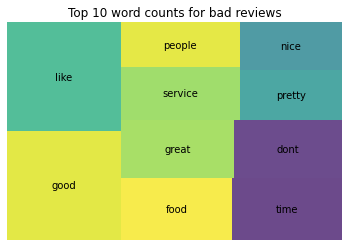

In [40]:
wc_top20 = wc1.head(10)

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8)
plt.axis('off')
plt.title('Top 10 word counts for bad reviews')
plt.show()

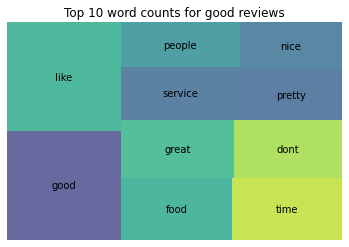

In [41]:
c_top20 = wc2.head(10)

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8)
plt.axis('off')
plt.title('Top 10 word counts for good reviews')
plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

